In [1]:
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('posts.csv')
df = df[pd.notnull(df['post_content'])]
df['post_date'] = pd.to_datetime(df['post_date'])
df['post_title'] = df['post_title'].replace(r'\u200b', '', regex=True)

In [3]:
df.head()

,post_date,post_title,post_content
0,2017-03-22 10:21:55,Le coup de fourchette du 16 juin 1995,"<span style=""font-weight: 400;"">Gentilhommière..."
2,2017-01-26 12:02:59,Le coup de fourchette du 31 juillet 1975,"<span style=""font-weight: 400;"">C</span><span ..."
3,2017-01-26 09:16:59,Le coup de fourchette du 4 octobre 1974,"<span style=""font-weight: 400;"">Qu’un chef vie..."
4,1974-09-13 09:04:13,Le coup de fourchette du 13 septembre 1974,"<span style=""font-weight: 400;"">Le Café du Rai..."
5,2017-01-26 09:38:58,Le coup de fourchette du 15 novembre 1974,"<span style=""font-weight: 400;"">Dans la Grand-..."


In [4]:
months = [
    'janvier',
    'février',
    'mars',
    'avril',
    'mai',
    'juin',
    'juillet',
    'août',
    'septembre',
    'octobre',
    'novembre',
    'décembre']

df['year'] = df['post_title'].str.extract(r'(\d\d\d\d)')
df['day'] = df['post_title'].str.extract(r'du *(\d\d?)')
df['month'] = df['post_title'].str.extract(r'\d\d?.?r? *([a-zûé]*) *\d\d\d\d')
df.dropna(how='any', inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [5]:
df['month'] = df['month'].apply(lambda x: str(months.index(x) + 1))
df['month'] = df['month'].str.pad(2, fillchar='0')
df['day'] = df['month'].str.pad(2, fillchar='0')
df['date_str'] = df['year'].astype(str) + "/" + df['month'].astype(str) + "/" + df['day'].astype(str)
df['date'] = pd.to_datetime(df['date_str'], format='%Y/%m/%d')
df.head()

,post_date,post_title,post_content,year,day,month,date_str,date
0,2017-03-22 10:21:55,Le coup de fourchette du 16 juin 1995,"<span style=""font-weight: 400;"">Gentilhommière...",1995,06,06,1995/06/06,1995-06-06
2,2017-01-26 12:02:59,Le coup de fourchette du 31 juillet 1975,"<span style=""font-weight: 400;"">C</span><span ...",1975,07,07,1975/07/07,1975-07-07
3,2017-01-26 09:16:59,Le coup de fourchette du 4 octobre 1974,"<span style=""font-weight: 400;"">Qu’un chef vie...",1974,10,10,1974/10/10,1974-10-10
4,1974-09-13 09:04:13,Le coup de fourchette du 13 septembre 1974,"<span style=""font-weight: 400;"">Le Café du Rai...",1974,09,09,1974/09/09,1974-09-09
5,2017-01-26 09:38:58,Le coup de fourchette du 15 novembre 1974,"<span style=""font-weight: 400;"">Dans la Grand-...",1974,11,11,1974/11/11,1974-11-11


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(
    use_idf=False,
    norm='l1',
    vocabulary=['viande', 'poisson', 'steak', 'saucisse', 'boeuf', 'veau', 'poulet', 'coquelet', 'volaille', 'porc', 'terrine', 'foie', 'poularde'])
matrix = vec.fit_transform(df['post_content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,viande,poisson,steak,saucisse,boeuf,veau,poulet,coquelet,volaille,porc,terrine,foie,poularde
0,0.75,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
2,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
3,0.00,0.666667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000
4,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [7]:
df['viande'] = wordcount_df[['viande', 'poisson', 'steak', 'saucisse', 'boeuf', 'veau', 'poulet', 'coquelet', 'volaille', 'porc', 'terrine', 'foie', 'poularde']].sum(axis=1)

In [8]:
df.head()

,post_date,post_title,post_content,year,day,month,date_str,date,viande
0,2017-03-22 10:21:55,Le coup de fourchette du 16 juin 1995,"<span style=""font-weight: 400;"">Gentilhommière...",1995,06,06,1995/06/06,1995-06-06,1.0
2,2017-01-26 12:02:59,Le coup de fourchette du 31 juillet 1975,"<span style=""font-weight: 400;"">C</span><span ...",1975,07,07,1975/07/07,1975-07-07,1.0
3,2017-01-26 09:16:59,Le coup de fourchette du 4 octobre 1974,"<span style=""font-weight: 400;"">Qu’un chef vie...",1974,10,10,1974/10/10,1974-10-10,1.0
4,1974-09-13 09:04:13,Le coup de fourchette du 13 septembre 1974,"<span style=""font-weight: 400;"">Le Café du Rai...",1974,09,09,1974/09/09,1974-09-09,0.0
5,2017-01-26 09:38:58,Le coup de fourchette du 15 novembre 1974,"<span style=""font-weight: 400;"">Dans la Grand-...",1974,11,11,1974/11/11,1974-11-11,1.0


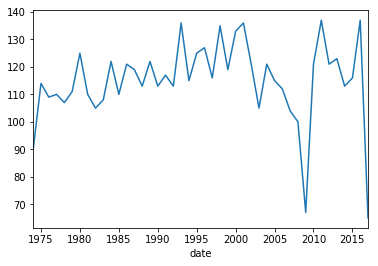

In [9]:
df.groupby(df['date'].dt.year)['post_title'].count().plot()

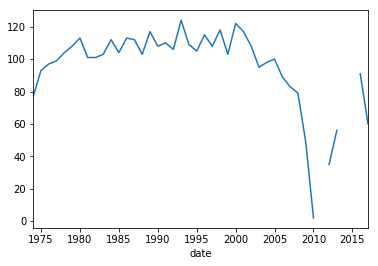

In [10]:
df.groupby(df['date'].dt.year)['viande'].sum().plot()

In [11]:
df.loc[2]['post_content']

'<span style="font-weight: 400;">C</span><span style="font-weight: 400;">omme toutes les choses précieuses, l\'excellence en cuisine est d\'une extrême fragilité. Les fanfares de la renommée souvent la corrompent. Aussi, quand on connaît l\'adresse de l\'Hôtel- de-Ville d\'Echallens, on est tenté de la garder jalousement pour soi et quelques amis élus. Mais, en même temps, on ne saurait passer sous silence tant de mérites. Alors, à pied, à cheval-vapeur ou en “brouette”, allez vite à Echallens : de la grande gastronomie vous attend avec tous les raffinements que le bon goût peut dicter à des hôtes épris de leur métier.</span>\r\n\r\n<span style="font-weight: 400;">L\'accueil est simple dans la grande salle à manger boisée toujours ornée de fleurs fraîches. Une grande table ronde couverte d\'îles flottantes, de tartes, de cakes, de fruits au sirop vous renseigne d\'entrée : ici, tous les desserts sont maison.</span>\r\n\r\n<span style="font-weight: 400;">C\'est qu\'aux fourneaux, il y a